In [1]:
import numpy as np#you usually need numpy

#---these are for plots---#
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.size']=16
plt.rcParams['font.family']='dejavu sans'

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.rm']='custom'
plt.rcParams['mathtext.it']='stix:italic'
plt.rcParams['mathtext.bf']='stix:bold'
#-------------------------#

In [2]:
#load the module
from sys import path as sysPath
from os import path as osPath
sysPath.append(osPath.join(osPath.dirname('./'), '../../src'))

from interfacePy.Axion import Axion 
from interfacePy.AxionMass import AxionMass

from interfacePy.Cosmo import Hubble,rho_crit,h_hub
from interfacePy.FT import FT #easy tick formatting


In [3]:
theta_i, fa=0.1, 1e16

umax=500
TSTOP=1e-4
ratio_ini=1e3

N_convergence_max, convergence_lim=15, 1e-2 #this is fine, but you can experiment a bit. 

#radiation dominated example
inputFile="../../UserSpace/InputExamples/MatterInput.dat" 

In [4]:
#you can define the axion mass using a data file
axionMass = AxionMass(r'../../src/data/chi.dat',0,1e5)

#you can define the axion mass via a function
# def ma2(T,fa):
#     TQCD=150*1e-3;
#     ma20=3.1575e-05/fa/fa;
#     if T<=TQCD:
#         return ma20;
#     return ma20*pow((TQCD/T),8.16)

# axionMass = AxionMass(ma2)


In [5]:
# options for the solver
# These variables are optional. Yoou can use the Axion class without them.
initial_step_size=1e-1; #initial step the solver takes. 
minimum_step_size=1e-8; #This limits the sepsize to an upper limit. 
maximum_step_size=1e-1; #This limits the sepsize to a lower limit.
absolute_tolerance=1e-11; #absolute tolerance of the RK solver
relative_tolerance=1e-11; #relative tolerance of the RK solver
beta=0.95; #controls how agreesive the adaptation is. Generally, it should be around but less than 1.

#The stepsize does not increase more than fac_max, and less than fac_min. 
#This ensures a better stability. Ideally, fac_max=inf and fac_min=0, but in reality one must 
#tweak them in order to avoid instabilities.
fac_max=1.2; 
fac_min=0.8;
maximum_No_steps=int(1e7); #maximum steps the solver can take Quits if this number is reached even if integration is not finished.


# Axion instance
ax=Axion(theta_i, fa, umax, TSTOP, ratio_ini, N_convergence_max, convergence_lim, inputFile, axionMass,
        initial_step_size,minimum_step_size, maximum_step_size, absolute_tolerance, 
        relative_tolerance, beta, fac_max, fac_min, maximum_No_steps)


In [6]:
# solve the EOM (this only gives you the relic, T_osc, theta_osc, and a_osc)
ax.solveAxion()

0.09328198432922363

In [7]:
ax.relic, ax.T_osc, ax.theta_osc

(0.12387636474146986, 0.05915789204856256, 0.04553279455391583)

In [8]:
ax.getPeaks()#this gives you the peaks of the oscillation
ax.getPoints()#this gives you all the points of integration
ax.getErrors()#this gives you local errors of integration

<IPython.core.display.Javascript object>


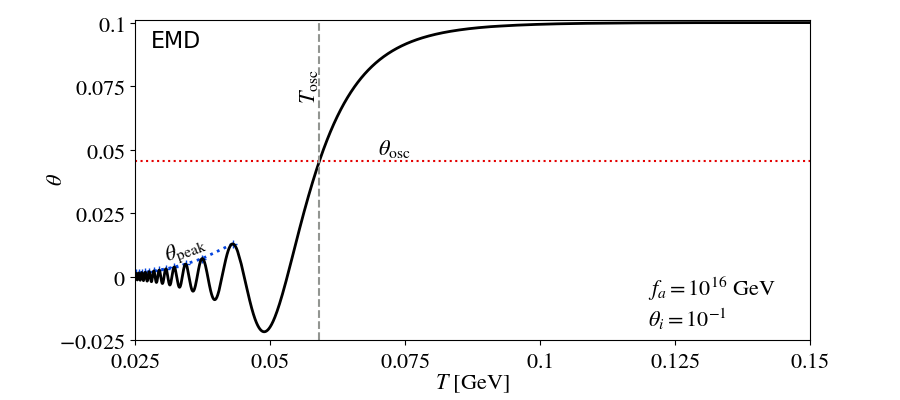

In [9]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
    sub = fig.add_subplot(1,1,1)
    
    #this plot shows the peaks of the oscillation
    sub.plot(ax.T_peak,ax.theta_peak,linestyle=':',marker='+',color='xkcd:blue',linewidth=2)

    #this plot shows all the points
    sub.plot(ax.T,ax.theta,linestyle='-',linewidth=2,alpha=1,c='xkcd:black')

    
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\theta$')
    sub.yaxis.set_label_coords(-0.1,0.5) 

    sub.axhline(ax.theta_osc,linestyle=':',color='xkcd:red',linewidth=1.5)
    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    
    
    
    #set major ticks
    _M_xticks=[ round(0.025+i*0.025,4) for i in range(0,15) ]
    _M_yticks=[ round(-0.025+i*0.025,3) for i in range(0,10)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.025,xmax=0.15,ymin=-0.025,ymax=0.101,xscale='linear',yscale='linear')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.055,y=0.07, s=r'$T_{\rm osc}$',rotation=90)
    sub.text(x=0.07,y=0.048, s=r'$\theta_{\rm osc}$')
    
    sub.text(x=0.03,y=0.006, s=r'$\theta_{\rm peak}$',rotation=20)
    
    sub.text(x=0.12,y=-0.02,
         s=r'$f_{a}=10^{16}~{\rm GeV}$'+'\n'+ r'$\theta_i = 10^{-1}$')
    sub.text(x=0.028,y=0.09, s=r'EMD')

    fig.savefig('theta_evolution-EMD.pdf',bbox_inches='tight')

    fig.show()

<IPython.core.display.Javascript object>


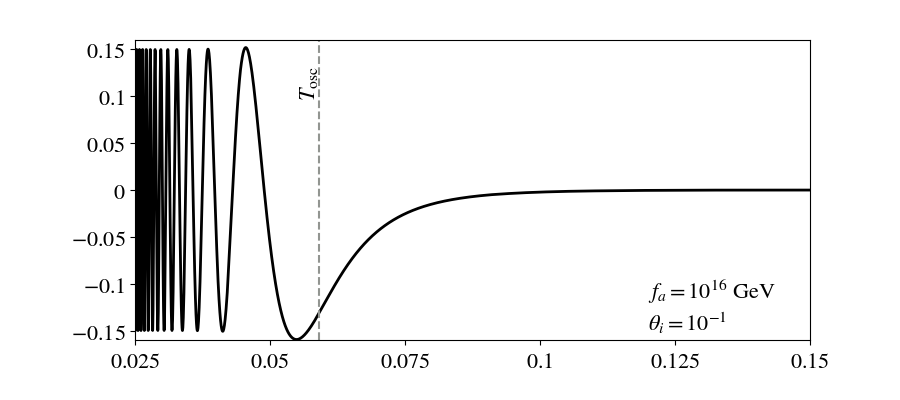

In [10]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    sub.plot(ax.T,ax.zeta,linestyle='-',linewidth=2,alpha=1,c='xkcd:black')
#     sub.plot(ax.T_peak,ax.zeta_peak,linestyle=':',marker='+',color='xkcd:blue',linewidth=2)
    
    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)

    
    #set major ticks
    _M_xticks=[ round(0.025+i*0.025,4) for i in range(0,15) ]
    _M_yticks=[ round(-0.15+i*0.05,3) for i in range(0,20,1)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.025,xmax=0.15,ymin=-0.16,ymax=0.16,xscale='linear',yscale='linear')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.055,y=0.1, s=r'$T_{\rm osc}$',rotation=90)
    
    
    sub.text(x=0.12,y=-0.15,
         s=r'$f_{a}=10^{16}~{\rm GeV}$'+'\n'+ r'$\theta_i = 10^{-1}$')

    
#     fig.savefig('zeta_evolution-EMD.pdf',bbox_inches='tight')-EMD

    fig.show()

<ipython-input-11-e1338ed7b544>:7: RuntimeWarning: invalid value encountered in true_divide
  sub.plot(ax.T,np.abs(ax.dzeta/ax.zeta),linestyle='-',linewidth=2,alpha=1,c='xkcd:red',label=r'$\dfrac{\delta \zeta}{\zeta}$')


<IPython.core.display.Javascript object>


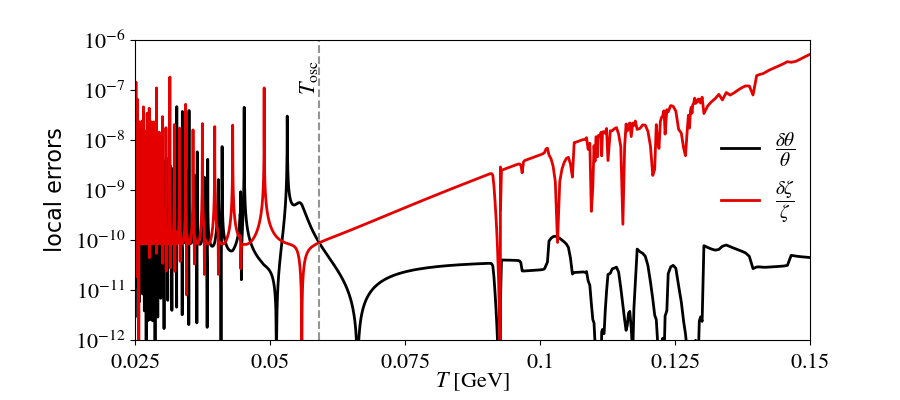

In [11]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    sub.plot(ax.T,np.abs(ax.dtheta/ax.theta),linestyle='-',linewidth=2,alpha=1,c='xkcd:black',label=r'$\dfrac{\delta \theta}{\theta}$')
    sub.plot(ax.T,np.abs(ax.dzeta/ax.zeta),linestyle='-',linewidth=2,alpha=1,c='xkcd:red',label=r'$\dfrac{\delta \zeta}{\zeta}$')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'local errors')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    sub.legend(bbox_to_anchor=(0.98, 0.7),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='upper right',fontsize=14,framealpha=0)
    
    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    
    #set major ticks
    _M_xticks=[ round(0.025+i*0.025,4) for i in range(0,15) ]
    _M_yticks=[ 10.**i for i in range(-12,5,1)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.025,xmax=0.15,ymin=1e-12,ymax=1e-6,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.055,y=1e-7, s=r'$T_{\rm osc}$',rotation=90)
    
    fig.savefig('local_errors-EMD.pdf',bbox_inches='tight')

    
    fig.show()


<IPython.core.display.Javascript object>


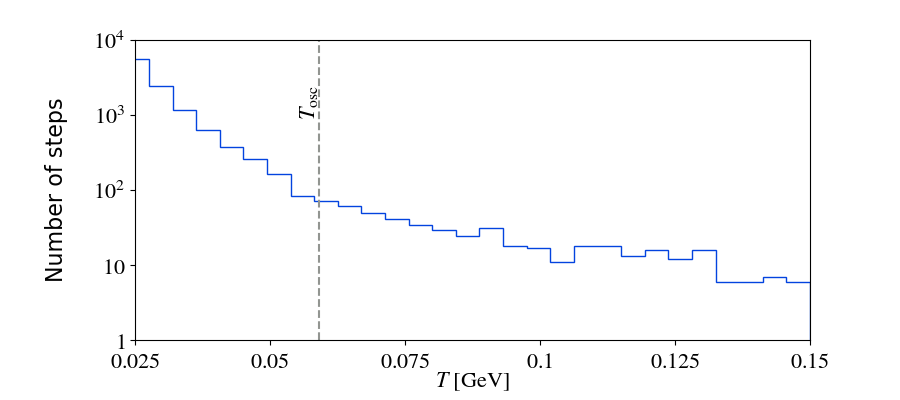

In [12]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)

    sub.hist(ax.T,bins=np.linspace(ax.T[-1],0.15,30),color='xkcd:blue',histtype='step')
    
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'Number of steps')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    


    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    
    
    #set major ticks
    _M_xticks=[ round(0.025+i*0.025,4) for i in range(0,15) ]
    _M_yticks=[ 10.**i for i in range(-12,5,1)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.025,xmax=0.15,ymin=1e0,ymax=1e4,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.055,y=1e3, s=r'$T_{\rm osc}$',rotation=90)

    fig.savefig('histogram-EMD.pdf',bbox_inches='tight')

    fig.show()


<IPython.core.display.Javascript object>


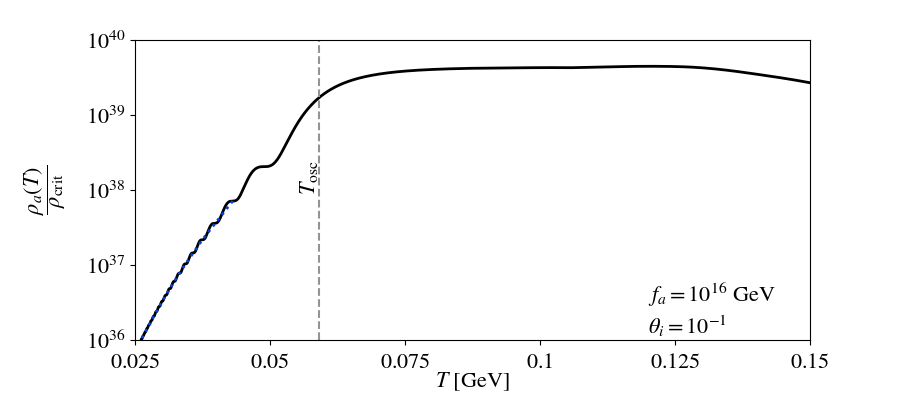

In [13]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    sub.plot(ax.T,ax.rho_axion/rho_crit,linestyle='-',linewidth=2,alpha=1,c='xkcd:black')
    sub.plot(ax.T_peak,ax.rho_axion_peak/rho_crit,linestyle=':',linewidth=2,alpha=1,c='xkcd:blue')

    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\dfrac{\rho_{a}(T)}{\rho_{\rm crit}}$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    
    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    #set major ticks
    _M_xticks=[ round(0.025+i*0.025,4) for i in range(0,15) ]
    _M_yticks=[ 10.**i for i in range(32,42,1)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.025,xmax=0.15,ymin=1e36,ymax=1e40,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.055,y=1e38, s=r'$T_{\rm osc}$',rotation=90)
    sub.text(x=0.12,y=1.2e36,
         s=r'$f_{a}=10^{16}~{\rm GeV}$'+'\n'+ r'$\theta_i = 10^{-1}$')


#     fig.savefig('axion_energy_density-EMD.pdf',bbox_inches='tight')


    fig.show()

<IPython.core.display.Javascript object>


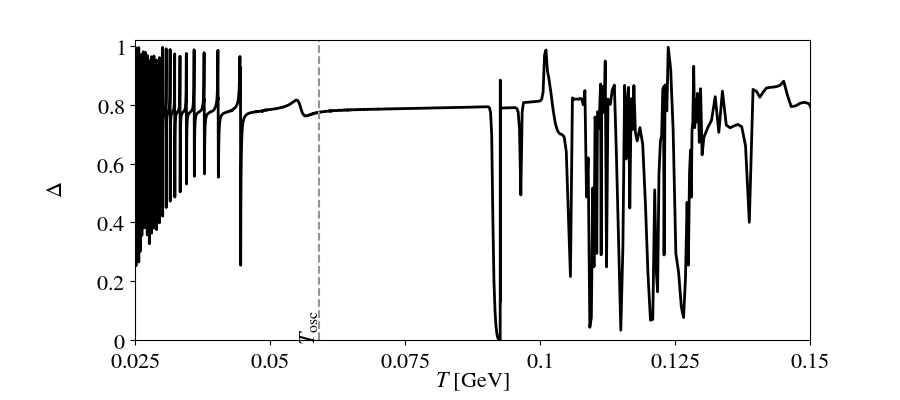

In [14]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    Delta=[1]
    for i,_ in enumerate(ax.T[1:]):
        sc1=relative_tolerance * max([np.abs(ax.theta[i]),np.abs(ax.theta[i-1])]) + absolute_tolerance
        sc2=relative_tolerance * max([np.abs(ax.zeta[i]),np.abs(ax.zeta[i-1])]) + absolute_tolerance
        Delta.append( np.sqrt(0.5*((ax.dtheta[i]/sc1)**2 + (ax.dzeta[i]/sc2)**2)) )
    
    Delta=np.array(Delta)
    
    sub.plot(ax.T,Delta,linestyle='-',linewidth=2,alpha=1,c='xkcd:black')
    
    sub.set_yscale('log')
    sub.set_xscale('linear')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\Delta$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    
    
    
    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    
    
    #set major ticks
    _M_xticks=[ round(0.025+i*0.025,4) for i in range(0,15) ]
    _M_yticks=[ round(0+i*0.2,2) for i in range(0,15) ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.025,xmax=0.15,ymin=0,ymax=1.02,xscale='linear',yscale='linear')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.055,y=1e-6, s=r'$T_{\rm osc}$',rotation=90)
    
#     fig.savefig('Delta-EMD.pdf',bbox_inches='tight')

    
    fig.show()


In [15]:
#run the destructor
del ax